# **Waste Management using CNN Model**

# *Libraries Importing & Data Setup*

In [1]:
pip install opencv-python

In [2]:
pip install tensorflow

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:08<00:00, 51.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [11]:
test_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"
train_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"

In [6]:
#This is another method to taking path of the file by download the dataset and paste the location.
#Note: Change the path of the file according to your own.
# train_path = "D:\All-in-one Stuff\Edunet Foundation\Green Skills using AI technologies\Week 1\Dataset\TEST"
# test_path = "D:\All-in-one Stuff\Edunet Foundation\Green Skills using AI technologies\Week 1\Dataset\TRAIN"

In [12]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [13]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])
data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [00:04<00:00, 2015.25it/s]


In [14]:
data.shape

(22564, 2)

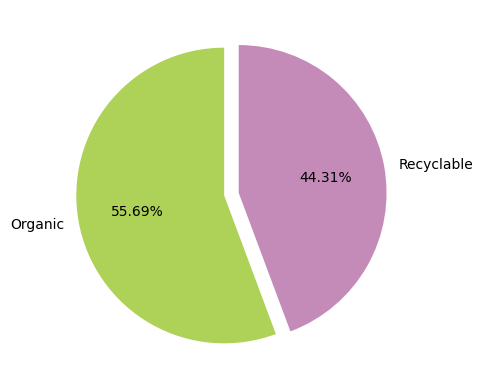

In [15]:
colors=['#aed157','#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'], autopct='%0.2f%%',  colors=colors, startangle = 90, explode= [0.05,0.05])
plt.show()